In [ ]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
    # Говорим Jupeter Notebook, чтобы весь графический вывод был в браузере, а не в отдельном окне
%matplotlib inline
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Для расчёта значений метрик и выбора моделей

## 0) Описание задачи

Нашей задачей будет исследовать набор данных, состоящий из зарплат популярных IT корпораций.
Будет выполнена визуализация данных, вычислены основные характеристики.
Данные разобьются на обучающую и тестовую выборку.
Также будет запущен классификатор ближайших соседей

## 1) Считываем данные

In [ ]:
url = "https://raw.githubusercontent.com/kuznetsov-ns/ML/main/Levels_Fyi_Salary_Data.csv"
data_raw = pd.read_csv(url)

In [ ]:
data_raw.shape

(62642, 29)

## 2)Визуализируем данные и вычисляем основные характеристики

Нашей задачей будет исследовать набор данных, состоящий из зарплат крупных IT корпораций. Будет выполнена визуализация данных, вычислены основные характеристики. Данные разобьются на обучающую и тестовую выборку. Также будет запущен классификатор ближайших соседей.

In [ ]:
data_raw

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
data_raw["totalyearlycompensation"]

0        127000
1        100000
2        310000
3        372000
4        157000
          ...  
62637    327000
62638    237000
62639    220000
62640    280000
62641    200000
Name: totalyearlycompensation, Length: 62642, dtype: int64

In [ ]:
# заменим на 1 все ЗП, которые >= 150000, а 0 все остальные
data_raw["binary_salary"] = np.where(data_raw["totalyearlycompensation"] >= 150000, 1, 0)

In [ ]:
data_raw["binary_salary"]

0        0
1        0
2        1
3        1
4        1
        ..
62637    1
62638    1
62639    1
62640    1
62641    1
Name: binary_salary, Length: 62642, dtype: int64

In [ ]:
# избавляемся от ненужных признаков
data_raw.drop(['Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
              'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'timestamp', 'gender',
               'otherdetails', 'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'cityid',
               'dmaid'], axis=1, inplace = True)

In [ ]:
data_raw.head(8)

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Education,binary_salary
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,0
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,1
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,1
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,1
5,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,NaN,0.0,0.0,0.0,NaN,1
6,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,NaN,180000.0,65000.0,55000.0,NaN,1
7,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.0,NaN,135000.0,8000.0,13000.0,NaN,1


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62637 non-null  object 
 1   level                    62523 non-null  object 
 2   title                    62642 non-null  object 
 3   totalyearlycompensation  62642 non-null  int64  
 4   location                 62642 non-null  object 
 5   yearsofexperience        62642 non-null  float64
 6   yearsatcompany           62642 non-null  float64
 7   tag                      61788 non-null  object 
 8   basesalary               62642 non-null  float64
 9   stockgrantvalue          62642 non-null  float64
 10  bonus                    62642 non-null  float64
 11  Education                30370 non-null  object 
 12  binary_salary            62642 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 6.2+ MB


## Признаки:

- company - название компании

- level - инженерный уровень

- title - название специализации

- totalyearlycompensation - суммарный размер ЗП

- location - локация офиса

- yearsofexperience - опыт работы

- yearsatcompany - время работы в данной компании

- tag - уровень разработчика

- basesalary - базовая ЗП

- stockgrantvalue - надбавка к ЗП

- bonus - премия (наверно)

- Education - образование

- binary_salary - банарная ЗП (1 = ЗП >= 150000, 0 = ЗП < 150000)

In [ ]:
# Преобразуем следующие типы к категориальным
data_raw['title'] = data_raw['title'].astype('category')
data_raw['Education'] = data_raw['Education'].astype('category')

In [ ]:
data_raw['title'].dtype

CategoricalDtype(categories=['Business Analyst', 'Data Scientist', 'Hardware Engineer',
                  'Human Resources', 'Management Consultant', 'Marketing',
                  'Mechanical Engineer', 'Product Designer', 'Product Manager',
                  'Recruiter', 'Sales', 'Software Engineer',
                  'Software Engineering Manager', 'Solution Architect',
                  'Technical Program Manager'],
, ordered=False)

In [ ]:
data_raw['Education'].dtype

CategoricalDtype(categories=['Bachelor's Degree', 'Highschool', 'Master's Degree', 'PhD',
                  'Some College'],
, ordered=False)

In [ ]:
# генерируем описательную статистику, она обобщает центральную тенденцию, дисперсию и форму распределения набора данных, исключая Nan значения
data_raw.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,binary_salary
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,0.692890
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,0.461299
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,1.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,1.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,1.000000


In [ ]:
# создаём корреляционную матрицу
corr_matrix = data_raw.corr()

<ipython-input-15-7f4a72f6fc80>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_raw.corr()


In [ ]:
corr_matrix

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,binary_salary
totalyearlycompensation,1.000000,0.422879,0.165802,0.672865,0.770756,0.489454,0.555521
yearsofexperience,0.422879,1.000000,0.522611,0.374437,0.289631,0.261051,0.279867
yearsatcompany,0.165802,0.522611,1.000000,0.145596,0.089492,0.108122,0.105746
basesalary,0.672865,0.374437,0.145596,1.000000,0.468266,0.394352,0.564058
stockgrantvalue,0.770756,0.289631,0.089492,0.468266,1.000000,0.248151,0.368007
bonus,0.489454,0.261051,0.108122,0.394352,0.248151,1.000000,0.309540
binary_salary,0.555521,0.279867,0.105746,0.564058,0.368007,0.309540,1.000000


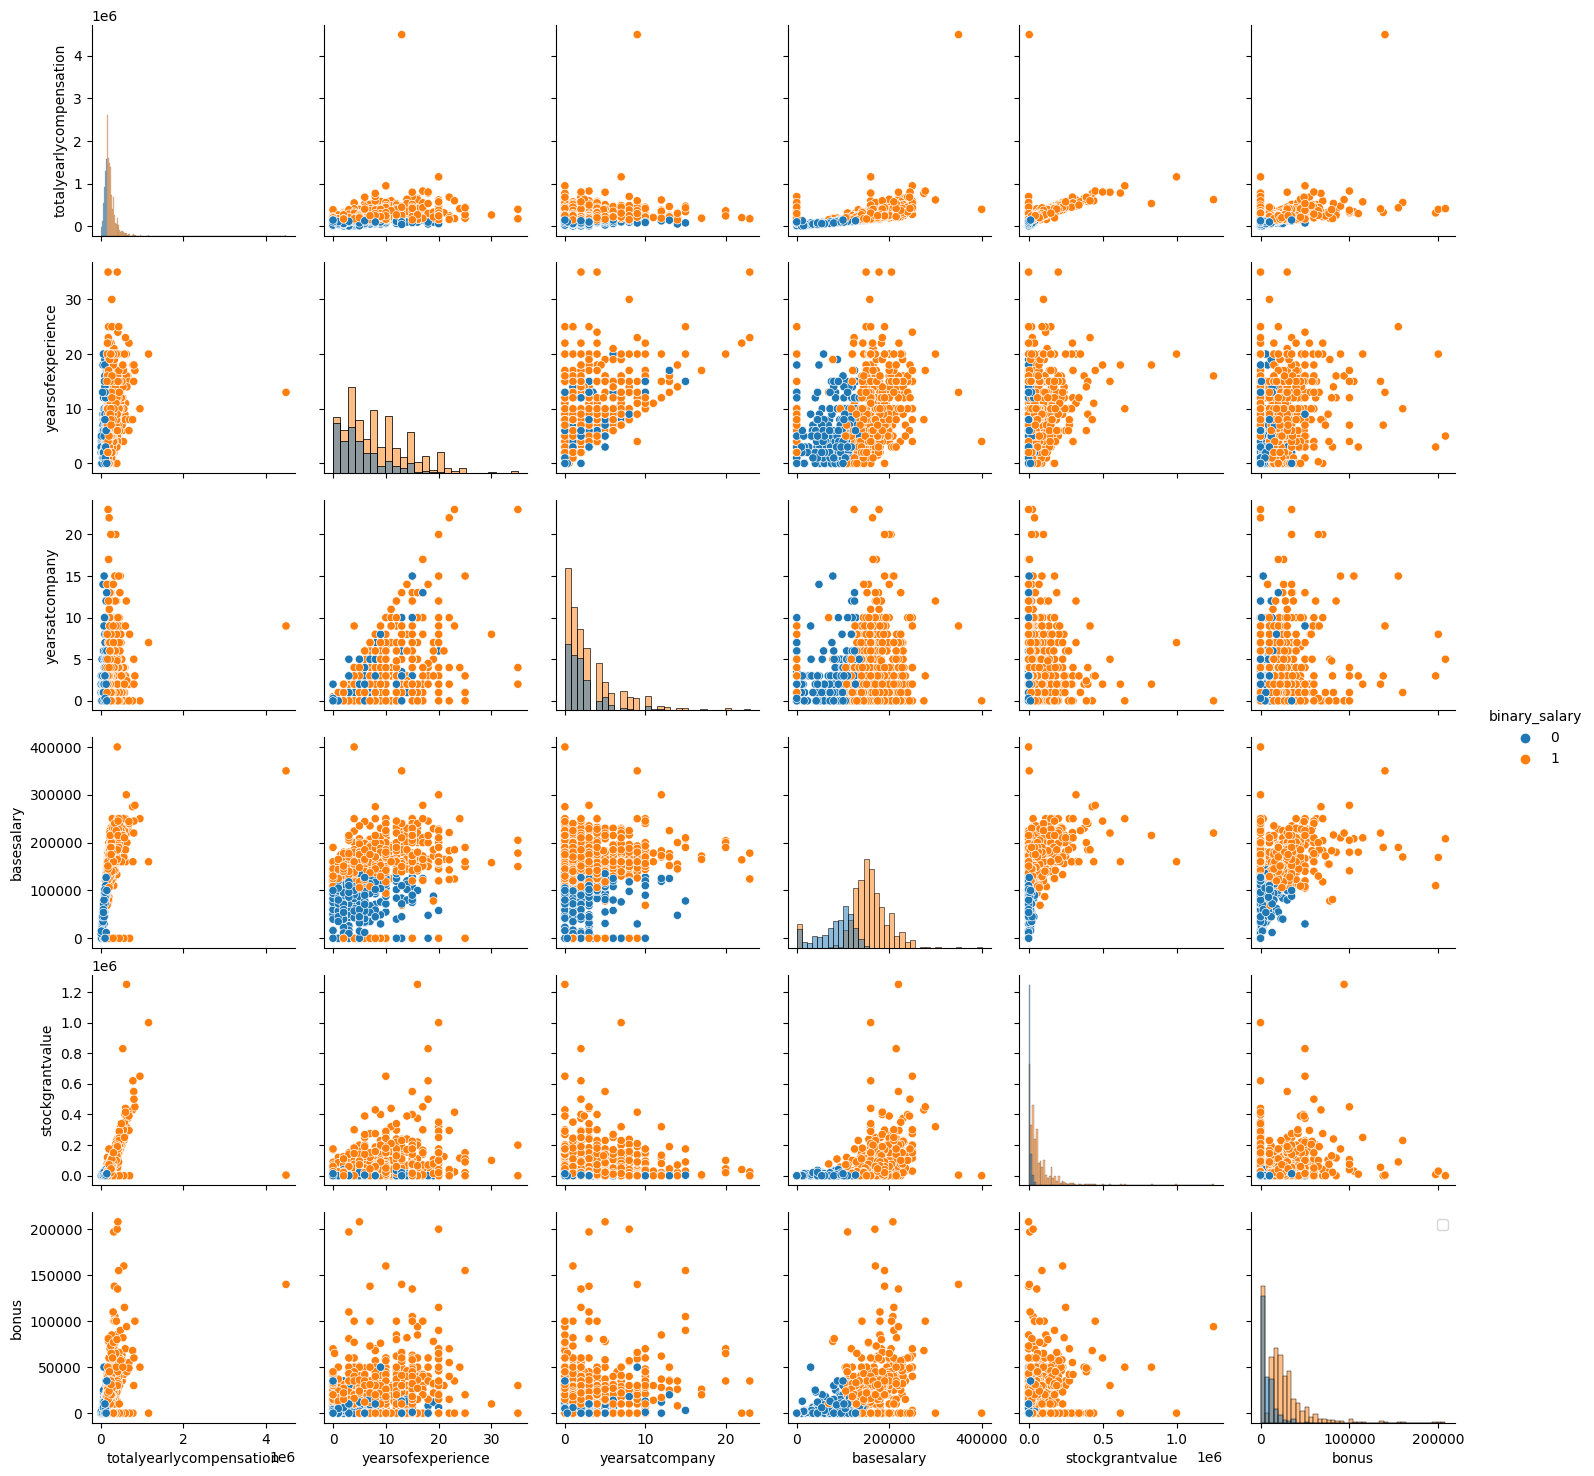

In [ ]:
# Построим все возможные диаграммы рассеивания для каждой пары переменных:
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
# binary_salary = 1, когда ЗП >= 150000, и 0, если ЗП < 150000
sns.pairplot(data_raw.iloc[random_subset], hue='binary_salary', diag_kind='hist')
plt.legend()
pass

## 3) Обрабатываем пропущенные значения

Под пропущенными значениями в таблице понимаются значения np.nan

In [ ]:
# Эта функция заменит в таблице значения с Nan на True, а все остальные значения на False
data_raw.isna()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Education,binary_salary
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,False,False,False,False,False,False,False,False,False,False,False,True,False
62638,False,False,False,False,False,False,False,False,False,False,False,True,False
62639,False,False,False,False,False,False,False,False,False,False,False,True,False
62640,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Покажем сколько пропусков есть в каждом признаке(столбце)
data_raw.isna().sum()

company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
Education                  32272
binary_salary                  0
dtype: int64

In [ ]:
# Заполним медианами пропущенные значения в столбцах (поэтому axis = 0), соответствующих числовым признакам
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

<ipython-input-20-2e0c94a0ed82>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)


In [ ]:
data_raw.isna().sum()

company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
Education                  32272
binary_salary                  0
dtype: int64

In [ ]:
# Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:
data_raw['company'].fillna(data_raw['company'].mode().iloc[0], inplace=True)
data_raw['level'].fillna(data_raw['level'].mode().iloc[0], inplace=True)
data_raw['tag'].fillna(data_raw['tag'].mode().iloc[0], inplace=True)
data_raw['Education'].fillna(data_raw['Education'].mode().iloc[0], inplace=True)

In [ ]:
# Убеждаемся, что теперь пропусков нет
data_raw.isna().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
Education                  0
binary_salary              0
dtype: int64

In [ ]:
data_raw.head(8)

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Education,binary_salary
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,Full Stack,107000.0,20000.0,10000.0,Master's Degree,0
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,Full Stack,0.0,0.0,0.0,Master's Degree,0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,Full Stack,155000.0,0.0,0.0,Master's Degree,1
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,Full Stack,157000.0,180000.0,35000.0,Master's Degree,1
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,Full Stack,0.0,0.0,0.0,Master's Degree,1
5,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,Full Stack,0.0,0.0,0.0,Master's Degree,1
6,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,Full Stack,180000.0,65000.0,55000.0,Master's Degree,1
7,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.0,Full Stack,135000.0,8000.0,13000.0,Master's Degree,1


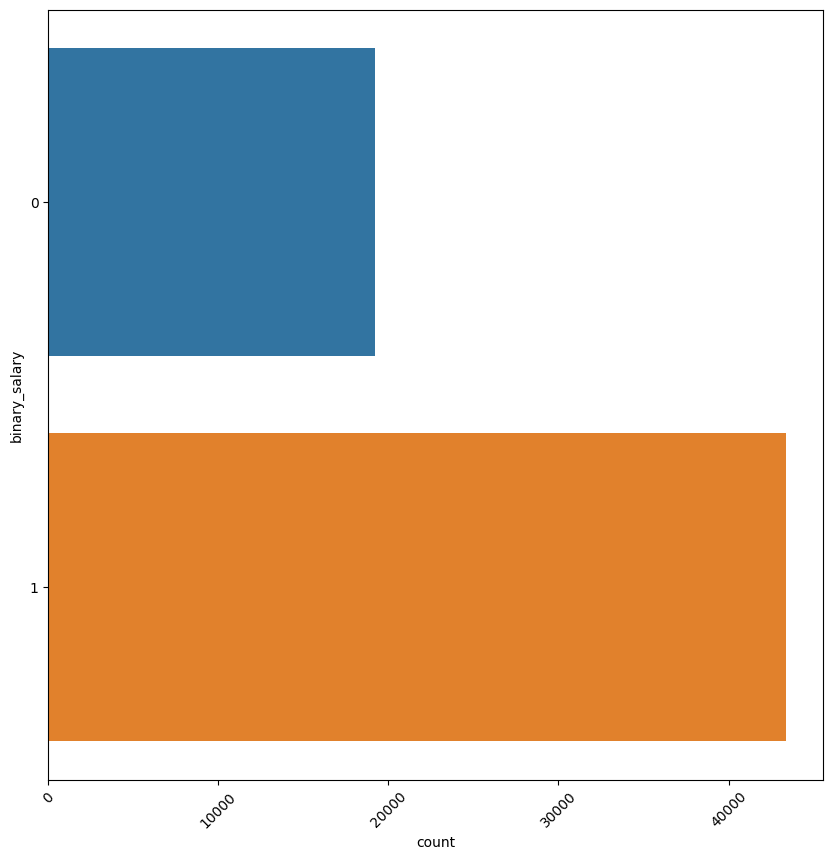

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y=data_raw['binary_salary'])
plt.xticks(rotation=45)
plt.show()

## 4) Обрабатываем категориальные(номинальные) признаки

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

In [ ]:
# Отберём подтаблицу с самыми нужными признаками и далее будем работать с ней
data_new = data_raw.loc[:, ['company', 'title', 'totalyearlycompensation', 'location', 'yearsofexperience',
                            'yearsatcompany', 'tag', 'Education', 'binary_salary']].copy()

In [ ]:
data_new.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,Education,binary_salary
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,Full Stack,Master's Degree,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,Full Stack,Master's Degree,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,Full Stack,Master's Degree,1
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,Full Stack,Master's Degree,1
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,Full Stack,Master's Degree,1


In [ ]:
# Категориальный (Бинарный) признак 'binary_salary' заменим на числовой.
data_new['binary_salary'] = pd.factorize(data_new['binary_salary'])[0]

In [ ]:
# К категориальному (небинарному) признаку 'title' применим метод бинаризации (one-hot encoding)
title_dummies = pd.get_dummies(data_new['title'])
Education_dummies = pd.get_dummies(data_new['Education'])

In [ ]:
# Добавим эти dummy-столбцы к таблице и удалим столбец Runtime:
data_new = pd.concat((data_new, title_dummies), axis=1)
data_new = data_new.drop(['title'], axis=1)
data_new = pd.concat((data_new, Education_dummies), axis=1)
data_new = data_new.drop(['Education'], axis=1)

In [ ]:
data_new.head() # вот что изменилось

,company,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,binary_salary,Business Analyst,Data Scientist,Hardware Engineer,...,Sales,Software Engineer,Software Engineering Manager,Solution Architect,Technical Program Manager,Bachelor's Degree,Highschool,Master's Degree,PhD,Some College
0,Oracle,127000,"Redwood City, CA",1.5,1.5,Full Stack,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eBay,100000,"San Francisco, CA",5.0,3.0,Full Stack,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,Amazon,310000,"Seattle, WA",8.0,0.0,Full Stack,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Apple,372000,"Sunnyvale, CA",7.0,5.0,Full Stack,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,Microsoft,157000,"Mountain View, CA",5.0,3.0,Full Stack,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


## 5) Нормализация количественных признаков

In [ ]:
# Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать
# Будем использовать стандартизацию - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению
# Выполним стандартизацию всех признаков:
data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)

C:\Users\accurst\AppData\Local\Temp\ipykernel_7224\2832100111.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)
C:\Users\accurst\AppData\Local\Temp\ipykernel_7224\2832100111.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)


In [ ]:
data_stand.describe()

,Bachelor's Degree,Business Analyst,Data Scientist,Hardware Engineer,Highschool,Human Resources,Management Consultant,Marketing,Master's Degree,Mechanical Engineer,...,Sales,Software Engineer,Software Engineering Manager,Solution Architect,Some College,Technical Program Manager,binary_salary,totalyearlycompensation,yearsatcompany,yearsofexperience
count,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,...,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04,6.264200e+04
mean,1.270350e-15,1.979409e-14,-8.214306e-15,-4.354704e-17,1.362768e-14,-2.256991e-16,2.391540e-14,1.244246e-14,1.369623e-13,6.174861e-15,...,-2.261255e-14,-1.873784e-14,-2.746883e-14,-2.172008e-15,-3.693099e-14,2.905373e-14,-6.442991e-14,2.228067e-16,-1.896397e-15,3.606408e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.018062e-01,-1.197085e-01,-2.071719e-01,-1.907825e-01,-7.165571e-02,-7.645042e-02,-1.258052e-01,-1.070701e-01,-1.783799e+00,-8.879061e-02,...,-8.610297e-02,-1.387682e+00,-2.457963e-01,-1.371762e-01,-7.549392e-02,-1.501417e-01,-1.502040e+00,-1.494565e+00,-8.279345e-01,-1.233505e+00
25%,-5.018062e-01,-1.197085e-01,-2.071719e-01,-1.907825e-01,-7.165571e-02,-7.645042e-02,-1.258052e-01,-1.070701e-01,5.605925e-01,-8.879061e-02,...,-8.610297e-02,-1.387682e+00,-2.457963e-01,-1.371762e-01,-7.549392e-02,-1.501417e-01,-1.502040e+00,-5.889891e-01,-8.279345e-01,-7.198399e-01
50%,-5.018062e-01,-1.197085e-01,-2.071719e-01,-1.907825e-01,-7.165571e-02,-7.645042e-02,-1.258052e-01,-1.070701e-01,5.605925e-01,-8.879061e-02,...,-8.610297e-02,7.206146e-01,-2.457963e-01,-1.371762e-01,-7.549392e-02,-1.501417e-01,6.657507e-01,-2.050250e-01,-2.151247e-01,-2.061743e-01
75%,-5.018062e-01,-1.197085e-01,-2.071719e-01,-1.907825e-01,-7.165571e-02,-7.645042e-02,-1.258052e-01,-1.070701e-01,5.605925e-01,-8.879061e-02,...,-8.610297e-02,7.206146e-01,-2.457963e-01,-1.371762e-01,-7.549392e-02,-1.501417e-01,6.657507e-01,3.455650e-01,3.976851e-01,4.787132e-01
max,1.992769e+00,8.353491e+00,4.826832e+00,5.241488e+00,1.395540e+01,1.308016e+01,7.948671e+00,9.339528e+00,5.605925e-01,1.126227e+01,...,1.161382e+01,7.206146e-01,4.068345e+00,7.289780e+00,1.324589e+01,6.660268e+00,6.657507e-01,3.451112e+01,2.031400e+01,1.058080e+01


## 6) Разбиваем данные на обучающую и тестовую выборки

In [ ]:
# Для предсказания Самых больших ЗП (binary_salary) будем использовать все входные признаки кроме
# location, company, yearsatcompany, tag, totalyearlycompensation и самого binary_salary
data_stand.columns

Index(['Bachelor's Degree', 'Business Analyst', 'Data Scientist',
       'Hardware Engineer', 'Highschool', 'Human Resources',
       'Management Consultant', 'Marketing', 'Master's Degree',
       'Mechanical Engineer', 'PhD', 'Product Designer', 'Product Manager',
       'Recruiter', 'Sales', 'Software Engineer',
       'Software Engineering Manager', 'Solution Architect', 'Some College',
       'Technical Program Manager', 'binary_salary', 'company', 'location',
       'tag', 'totalyearlycompensation', 'yearsatcompany',
       'yearsofexperience'],
      dtype='object')

In [ ]:
X = data_stand.drop(['location', 'tag', 'company', 'yearsatcompany', 'yearsofexperience', 'totalyearlycompensation', 'binary_salary'], axis=1)
y = data_new['binary_salary']

In [ ]:
X.head()

,Bachelor's Degree,Business Analyst,Data Scientist,Hardware Engineer,Highschool,Human Resources,Management Consultant,Marketing,Master's Degree,Mechanical Engineer,PhD,Product Designer,Product Manager,Recruiter,Sales,Software Engineer,Software Engineering Manager,Solution Architect,Some College,Technical Program Manager
0,-0.501806,-0.119709,-0.207172,-0.190782,-0.071656,-0.07645,-0.125805,-0.10707,0.560592,-0.088791,-0.167169,-0.157483,3.522058,-0.085157,-0.086103,-1.387682,-0.245796,-0.137176,-0.075494,-0.150142
1,-0.501806,-0.119709,-0.207172,-0.190782,-0.071656,-0.07645,-0.125805,-0.10707,0.560592,-0.088791,-0.167169,-0.157483,-0.283920,-0.085157,-0.086103,0.720615,-0.245796,-0.137176,-0.075494,-0.150142
2,-0.501806,-0.119709,-0.207172,-0.190782,-0.071656,-0.07645,-0.125805,-0.10707,0.560592,-0.088791,-0.167169,-0.157483,3.522058,-0.085157,-0.086103,-1.387682,-0.245796,-0.137176,-0.075494,-0.150142
3,-0.501806,-0.119709,-0.207172,-0.190782,-0.071656,-0.07645,-0.125805,-0.10707,0.560592,-0.088791,-0.167169,-0.157483,-0.283920,-0.085157,-0.086103,-1.387682,4.068345,-0.137176,-0.075494,-0.150142
4,-0.501806,-0.119709,-0.207172,-0.190782,-0.071656,-0.07645,-0.125805,-0.10707,0.560592,-0.088791,-0.167169,-0.157483,-0.283920,-0.085157,-0.086103,0.720615,-0.245796,-0.137176,-0.075494,-0.150142


In [ ]:
# Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

In [ ]:
N_train, N_test

(46981, 15661)

## 7-8) Запускаем классификатор ближайших соседей и вычисляем ошибки на обучающей и тестовой выборках

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 68.27%, Test: 68.75%. 


In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors = 2)
knn_2.fit(X_train, y_train)
knn_training_predict = 100 * knn_2.score(X_train, y_train)
knn_test_predict = 100 * knn_2.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 62.78%, Test: 63.39%. 


In [ ]:
knn_8 = KNeighborsClassifier(n_neighbors = 8)
knn_8.fit(X_train, y_train)
knn_training_predict = 100 * knn_8.score(X_train, y_train)
knn_test_predict = 100 * knn_8.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 68.49%, Test: 68.84%. 


In [ ]:
knn_12 = KNeighborsClassifier(n_neighbors = 12)
knn_12.fit(X_train, y_train)
knn_training_predict = 100 * knn_12.score(X_train, y_train)
knn_test_predict = 100 * knn_12.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 69.49%, Test: 69.98%. 


In [ ]:
knn_15 = KNeighborsClassifier(n_neighbors = 15)
knn_15.fit(X_train, y_train)
knn_training_predict = 100 * knn_15.score(X_train, y_train)
knn_test_predict = 100 * knn_15.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 69.52%, Test: 70.24%. 


# Вывод

Можно сделать вывод, что при малом колличестве соседей, точность на выборках ниже. Однако при большом колличестве соседей точность незначительно увеличивается.

# Обучение полносвязной нейронной сети

In [ ]:
new_data = data_new.copy()
new_data.drop(['company', 'location', 'tag'], axis=1, inplace = True)

X = new_data.drop('binary_salary', axis = 1) # выбрасываем столбец 'binary_salary'
y = new_data['binary_salary']
feature_names = X.columns
feature_names

Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
       'Business Analyst', 'Data Scientist', 'Hardware Engineer',
       'Human Resources', 'Management Consultant', 'Marketing',
       'Mechanical Engineer', 'Product Designer', 'Product Manager',
       'Recruiter', 'Sales', 'Software Engineer',
       'Software Engineering Manager', 'Solution Architect',
       'Technical Program Manager', 'Bachelor's Degree', 'Highschool',
       'Master's Degree', 'PhD', 'Some College'],
      dtype='object')

In [ ]:
print(X.shape)
print(y.shape)
N, d = X.shape

(62642, 23)
(62642,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

46981 15661


### Обучение классификатора

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

##### Подбор количества нейронов в однослойной сети

In [ ]:
hidden_layer_size = np.linspace(1, 50, 50)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,),
                          solver='adam', activation='relu', max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [04:05<00:00,  4.91s/it]


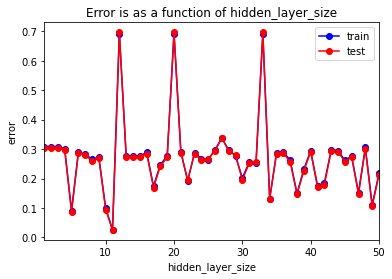

In [ ]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

In [ ]:
print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: Min error=0.0257763776845959, number of neurons=11
Test: Min error=0.024966477236447227, number of neurons=11


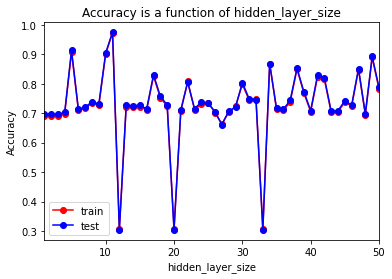

In [ ]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

Train: max accuracy=0.974223622315404, number of neurons=11
Test: max accuracy=0.9750335227635528, number of neurons=11


Для однослойной сети самая минимальная ошибка на 11 нейронах состоавляет 2.49%, самая большая точность также на 11 нейронах составила 97.50%

#### Подбор количества нейронов в двуслойной сети

In [ ]:
n = 10
sizes = np.linspace(1, 50, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ),
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [16:32, 99.28s/it] 


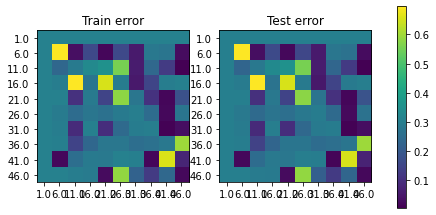

In [ ]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = [train_min_loss[0][0] * 5, train_min_loss[1][0] * 5]
test_min_loss_sizes = [test_min_loss[0][0] * 5, test_min_loss[1][0] * 5]

In [ ]:
print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: error={0}, number of neurons={1},{2}\n".format(test_err[train_min_loss][0], train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), test_min_loss_sizes[0], test_min_loss_sizes[1]))
print("Train: error={0}, number of neurons={1},{2}\n".format(train_err[test_min_loss][0], test_min_loss_sizes[0], test_min_loss_sizes[1]))

Train: Min error=0.00674740852685128, number of neurons=10,45
Test: error=0.006512994061681885, number of neurons=10,45

Test: Min error=0.006512994061681885, number of neurons=10,45
Train: error=0.00674740852685128, number of neurons=10,45



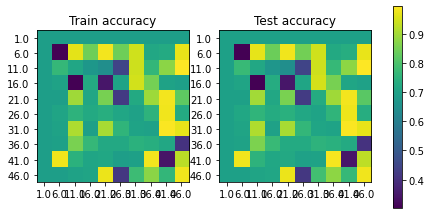

In [ ]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))

train_max_acc_sizes = [train_max_acc[0][0] * 5, train_max_acc[1][0] * 5]
test_max_acc_sizes = [test_max_acc[0][0] * 5, test_max_acc[1][0] * 5]

In [ ]:
print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: accuracy={0}, number of neurons={1},{2}\n".format(test_acc[train_max_acc][0], train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), test_max_acc_sizes[0], test_max_acc_sizes[1]))
print("Train: accuracy={0}, number of neurons={1},{2}\n".format(train_acc[test_max_acc][0], test_max_acc_sizes[0], test_max_acc_sizes[1]))

Train: Max accuracy=0.9932525914731487, number of neurons=10,45
Test: accuracy=0.9934870059383181, number of neurons=10,45

Test: Max accuracy=0.9934870059383181, number of neurons=10,45
Train: accuracy=0.9932525914731487, number of neurons=10,45



#### Подбор параметра регуляризации

In [ ]:
alpha_arr = np.logspace(-3, 2, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(30,40),
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [16:25<00:00, 19.71s/it]


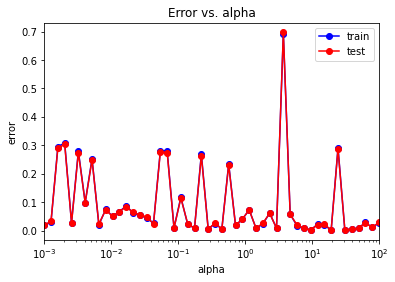

In [ ]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

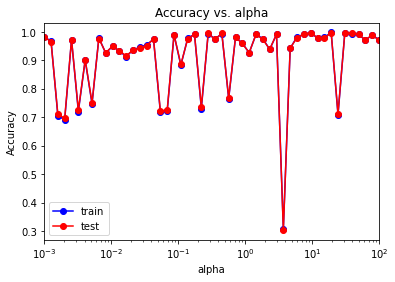

In [ ]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

##### Проделаем тоже самое для 10 нейронов

In [ ]:
alpha_arr2 = np.logspace(-3, 2, 50)
test_err2 = []
train_err2 = []
train_acc2 = []
test_acc2 = []

for alpha in tqdm(alpha_arr2):
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(10,),
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err2.append(np.mean(y_train != y_train_pred))
    test_err2.append(np.mean(y_test != y_test_pred))
    train_acc2.append(accuracy_score(y_train, y_train_pred))
    test_acc2.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [02:29<00:00,  2.99s/it]


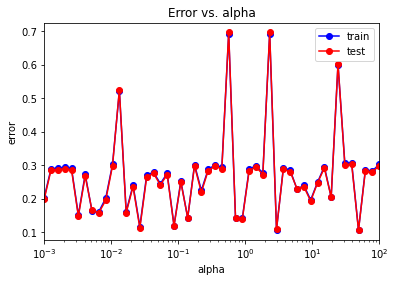

In [ ]:
plt.semilogx(alpha_arr2, train_err2, 'b-o', label = 'train')
plt.semilogx(alpha_arr2, test_err2, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr2), np.max(alpha_arr2)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

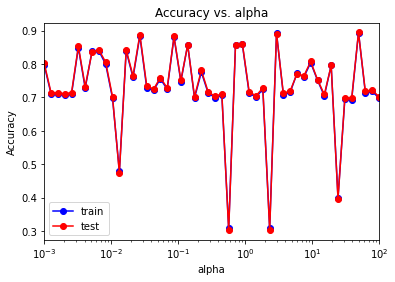

In [ ]:
plt.semilogx(alpha_arr2, train_acc2, 'b-o', label = 'train')
plt.semilogx(alpha_arr2, test_acc2, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr2), np.max(alpha_arr2)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Из графиков 1 и 2 теста заметно, что результаты тестовой выборки приближены к результатам тренировочной, но всё-таки можно выделить оптимальное значение alpha = 5.
В таком случае точность и на тестовой, и на обучающей выборке почти совпадает, и самое главное, что точность остаётся хоть и не на максимальном уровне (как при очень маленьких alpha), но всё также на очень высоком.

Возьмём в качестве оптимального значения alpha = 5

In [ ]:
alpha_opt = 5
print("Alpha opt:", alpha_opt)

Alpha opt: 5


In [ ]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(20,),
                          solver='adam', activation='relu', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test_pred, y_test))

[[  237     0]
 [ 4513 10911]]


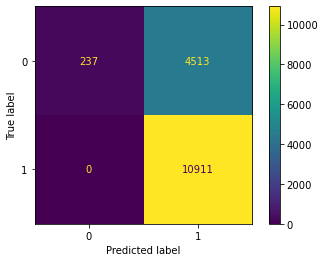

In [ ]:
predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

# Выводы

### Подбор числа нейронов в однослойной моделе

1) Графики Error и Accuracy для train и test почти зеркальны, что говорит об почти одинаковом распределении тренировочных и тестовых данных.
2) Наблюдается переобучение. Результаты точности тренировной выборки оказались выше примерно на 0.1%, чем у тестовой. Это говорит об умении модели обучаться.
3) За оптимальный размер скрытого слоя возьмём минимум ошибки и максимум точности на тестовой выборке 99.3% - 11 нейрон.
4) При количестве нейровнов в слое больше 2 уже достигается точность выше 99.3%. Это говорит о том, что все входные объекты могут быть спроецированы в двумерное пространство и разделены на классы с высокой точностью.

### Подбор числа нейронов в двуслойной моделе

1) Не наблюдается недообучения тренировочной выборки, по сравнению с тестовой (это видно из графиков, они идентичны)
2) За оптимальные размеры скрытых слоёв возьмём минимум ошибки и максимум точности на тестовой выборке 99.32% - 10 и 45 нейронов